In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv"
tickers = pd.read_csv(url)
sp500_list = tickers['Symbol'].to_list()

In [3]:
# tickers.to_csv('sp500_companies.csv')

In [4]:
len(sp500_list)

502

In [7]:
sp500_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG

In [5]:
df_sp500 = pd.read_pickle('sp500_data_2017-01-01_2023-04-01.pkl')
df_sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000
...,...,...,...,...,...,...
2023-03-27,3982.929932,4003.830078,3970.489990,3977.530029,3977.530029,4233540000
2023-03-28,3974.129883,3979.199951,3951.530029,3971.270020,3971.270020,4014600000
2023-03-29,3999.530029,4030.590088,3999.530029,4027.810059,4027.810059,4145250000


In [6]:
df_price = pd.read_pickle('us_stock_data_2017-01-01_2023-04-01.pkl')
df_price

Open        High         Low       Close   Adj Close  \
Date       Code                                                               
2017-01-03 A      45.930000   46.750000   45.740002   46.490002   44.295284   
           AAL    47.279999   47.340000   46.139999   46.299999   44.741219   
           AAP   170.779999  171.360001  169.309998  170.600006  160.039337   
           AAPL   28.950001   29.082500   28.690001   29.037500   27.133322   
           ABBV   62.919998   63.029999   61.939999   62.410000   47.287491   
...                     ...         ...         ...         ...         ...   
2023-03-31 YUM   130.179993  132.270004  129.990005  132.080002  132.080002   
           ZBH   127.919998  129.320007  127.690002  129.199997  129.199997   
           ZBRA  310.000000  318.850006  310.000000  318.000000  318.000000   
           ZION   30.510000   30.879999   29.299999   29.930000   29.930000   
           ZTS   165.100006  166.490005  164.029999  166.440002  166.440002   

                      Volume  return_1d  return_5d  return_20d    Adj Open  
Date       Code                                                             
2017-01-03 A       1739600.0   0.002557   0.023439    0.041551   43.761720  
           AAL     6737800.0  -0.002359   0.057045   -0.064765   45.688224  
           AAP      691300.0   0.002935   0.018431   -0.060339  160.208188  
           AAPL  115127600.0   0.000604   0.024946    0.104705   27.051560  
           ABBV    9328200.0   0.011813   0.022022   -0.022000   47.673912  
...                      ...        ...        ...         ...         ...  
2023-03-31 YUM     1705800.0        NaN        NaN         NaN  130.179993  
           ZBH     1212600.0        NaN        NaN         NaN  127.919998  
           ZBRA     373400.0        NaN        NaN         NaN  310.000000  
           ZION    5142900.0        NaN        NaN         NaN   30.510000  
           ZTS     1705000.0        NaN        NaN         NaN  165.100006  

[753873 rows x 10 columns]

In [7]:
# df_price = df_price.reset_index()
# df_price = df_price[df_price.Code.isin(sp500_list)]
# df_price = df_price.set_index(['Date', 'Code'])

<AxesSubplot:xlabel='Date'>

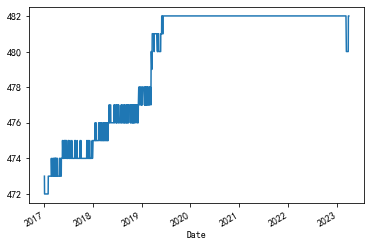

In [8]:
df_price['Open'].unstack().count(axis=1).plot()

In [9]:
# df_price['Adj Open'] = df_price['Open']*df_price['Adj Close']/df_price['Close']
# for i in [1,5,20]:
#     df_price[f'return_{i}d'] = (df_price['Adj Open'].unstack().shift(-(i+1))/df_price['Adj Open'].unstack().shift(-1)-1).stack()

In [8]:
for i in [1, 20]:
    df_price[f'mom_{i}d'] = (df_price['Adj Close'].unstack().shift(0)/df_price['Adj Close'].unstack().shift(i)).stack()
    
for i in [20]:
    df_price[f'vol_std_{i}d'] = df_price[f'mom_1d'].unstack().rolling(i).std().stack()
    
df_v = df_price['Volume'].unstack()
df_abs_v = abs(df_v.subtract(df_v.mean(axis=1), axis=0)).rolling(20).mean()

df_amt_20d = (df_price['High']/df_price['Low']-1).unstack().rolling(20).std()

In [9]:
df_price

Open        High         Low       Close   Adj Close  \
Date       Code                                                               
2017-01-03 A      45.930000   46.750000   45.740002   46.490002   44.295284   
           AAL    47.279999   47.340000   46.139999   46.299999   44.741219   
           AAP   170.779999  171.360001  169.309998  170.600006  160.039337   
           AAPL   28.950001   29.082500   28.690001   29.037500   27.133322   
           ABBV   62.919998   63.029999   61.939999   62.410000   47.287491   
...                     ...         ...         ...         ...         ...   
2023-03-31 YUM   130.179993  132.270004  129.990005  132.080002  132.080002   
           ZBH   127.919998  129.320007  127.690002  129.199997  129.199997   
           ZBRA  310.000000  318.850006  310.000000  318.000000  318.000000   
           ZION   30.510000   30.879999   29.299999   29.930000   29.930000   
           ZTS   165.100006  166.490005  164.029999  166.440002  166.440002   

                      Volume  return_1d  return_5d  return_20d    Adj Open  \
Date       Code                                                              
2017-01-03 A       1739600.0   0.002557   0.023439    0.041551   43.761720   
           AAL     6737800.0  -0.002359   0.057045   -0.064765   45.688224   
           AAP      691300.0   0.002935   0.018431   -0.060339  160.208188   
           AAPL  115127600.0   0.000604   0.024946    0.104705   27.051560   
           ABBV    9328200.0   0.011813   0.022022   -0.022000   47.673912   
...                      ...        ...        ...         ...         ...   
2023-03-31 YUM     1705800.0        NaN        NaN         NaN  130.179993   
           ZBH     1212600.0        NaN        NaN         NaN  127.919998   
           ZBRA     373400.0        NaN        NaN         NaN  310.000000   
           ZION    5142900.0        NaN        NaN         NaN   30.510000   
           ZTS     1705000.0        NaN        NaN         NaN  165.100006   

                   mom_1d   mom_20d  vol_std_20d  
Date       Code                                   
2017-01-03 A          NaN       NaN          NaN  
           AAL        NaN       NaN          NaN  
           AAP        NaN       NaN          NaN  
           AAPL       NaN       NaN          NaN  
           ABBV       NaN       NaN          NaN  
...                   ...       ...          ...  
2023-03-31 YUM   1.021263  1.018586     0.009468  
           ZBH   1.019249  1.025563     0.011029  
           ZBRA  1.028760  1.027630     0.021125  
           ZION  0.987789  0.607963     0.073950  
           ZTS   1.013951  0.975844     0.014735  

[753873 rows x 13 columns]

In [10]:
df_price['factor'] = (-df_price['mom_20d'].unstack().rank(axis=1, pct=True)
                      +df_price['vol_std_20d'].unstack().rank(axis=1, pct=True)
                      +df_abs_v.rank(axis=1, pct=True)
                      +df_amt_20d.rank(axis=1, pct=True)).stack()/4

In [12]:
df_rank = df_price['factor'].unstack().rank(axis=1, pct=True, ascending=False)
df_hold = (df_rank<=0.1).replace(False, np.nan).shift(1)
trading_days = df_hold.index
df_hold = df_hold.reset_index()
df_hold['Month'] = trading_days.year*100+trading_days.month
df_hold_month = df_hold.groupby('Month').head(1).set_index(['Date']).iloc[:, :-1].fillna(-1).reindex(trading_days).fillna(method='ffill').replace(-1,np.nan)
df_hold_month = df_hold_month[(df_hold_month.index>='2018-01-01')&(df_hold_month.index<='2023-01-01')]
df_hold_month

Code,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2018-01-03,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2018-01-04,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2018-01-05,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2018-01-08,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-27,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_hold_month.iloc[0:1].stack().unstack()

Code,AAP,ALGN,AMAT,AMD,BIO,BSX,CMCSA,CMG,COO,CSX,...,RHI,ROP,SEDG,SRE,SWKS,TDY,TFX,TSLA,TTWO,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [20]:
trading_dates_list = pd.date_range('2017-10-01', '2022-12-30', freq='1MS', closed='left').astype(str).tolist()+['2023-01-01']
n_shift = len(trading_dates_list)-60
df_hold_weight = []
for i in range(60):
    sd0 = trading_dates_list[i]
    sd1 = trading_dates_list[i+n_shift-1]
    ed1 = trading_dates_list[i+n_shift]
    print(sd0, sd1, ed1)
    df_hold_weighti = df_hold_month[(df_hold_month.index>=sd1)&(df_hold_month.index<ed1)]
    # single-index model
    # RA
    df_X = (df_price['mom_20d'].unstack()*df_hold_month[(df_hold_month.index>=sd1)&(df_hold_month.index<ed1)].iloc[0]).stack().unstack()-1
    df_X = df_X[(df_X.index>=sd0)&(df_X.index<sd1)].astype('float')
    
    # RM
    df_sp500['mom_20d'] = df_sp500['Adj Close'].pct_change(20)
    df_Y = df_sp500[(df_sp500.index>=sd0)&(df_sp500.index<sd1)][['mom_20d']].astype('float')

    # cal weights(long only)
    df_weight = pd.DataFrame(index=df_X.columns)

    # RF
    RF = (1+0.03)**(20/252)-1
    # market_risk
    market_risk = df_Y.var().values[0]

    df_weight['beta'] = (df_X.subtract(df_X.mean(axis=0), axis=1)*(df_Y-df_Y.mean()).values).mean(axis=0)/df_Y.std().values[0]
    df_weight['alpha'] = df_X.mean(axis=0)-df_weight['beta']*df_Y.mean().values[0]
    df_weight['Expected Return'] = df_weight['alpha']+df_weight['beta']*df_Y.mean().values[0]
    df_weight['Unsystematic Risk'] = (df_X - (df_weight['alpha'].values+df_weight['beta'].values*df_Y.values)).var(axis=0)
    df_weight['Excess Return over Beta Risk'] = (df_weight['Expected Return']-RF)/df_weight['beta']
    df_weight = df_weight.sort_values('Excess Return over Beta Risk', ascending=False)
    df_weight['f1'] = (df_weight['Expected Return']-RF)*df_weight['beta']/df_weight['Unsystematic Risk']
    df_weight['f2'] = df_weight['beta']**2/df_weight['Unsystematic Risk']
    df_weight['f1_cumsum'] = df_weight['f1'] .cumsum()
    df_weight['f2_cumsum'] = df_weight['f2'] .cumsum()
    df_weight['ci'] = (market_risk*df_weight['f1_cumsum'])/(1+market_risk*df_weight['f2_cumsum'])
    df_weight['zi'] = (df_weight['beta']/df_weight['Unsystematic Risk'])*(df_weight['Expected Return']-df_weight['ci'].max())
    df_weight['wi'] = df_weight['zi'].apply(lambda x: x if x>=0 else 0)
    df_weight['wi'] = df_weight['wi']/df_weight['wi'].sum()
    df_hold_weight.append(df_hold_weighti*df_weight['wi'])
    
df_hold_weight = pd.concat(df_hold_weight, axis=0)

<ipython-input-20-9221e10b8652>:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  trading_dates_list = pd.date_range('2017-10-01', '2022-12-30', freq='1MS', closed='left').astype(str).tolist()+['2023-01-01']


2017-10-01 2018-01-01 2018-02-01
2017-11-01 2018-02-01 2018-03-01
2017-12-01 2018-03-01 2018-04-01
2018-01-01 2018-04-01 2018-05-01
2018-02-01 2018-05-01 2018-06-01
2018-03-01 2018-06-01 2018-07-01
2018-04-01 2018-07-01 2018-08-01
2018-05-01 2018-08-01 2018-09-01
2018-06-01 2018-09-01 2018-10-01
2018-07-01 2018-10-01 2018-11-01
2018-08-01 2018-11-01 2018-12-01
2018-09-01 2018-12-01 2019-01-01
2018-10-01 2019-01-01 2019-02-01
2018-11-01 2019-02-01 2019-03-01
2018-12-01 2019-03-01 2019-04-01
2019-01-01 2019-04-01 2019-05-01
2019-02-01 2019-05-01 2019-06-01
2019-03-01 2019-06-01 2019-07-01
2019-04-01 2019-07-01 2019-08-01
2019-05-01 2019-08-01 2019-09-01
2019-06-01 2019-09-01 2019-10-01
2019-07-01 2019-10-01 2019-11-01
2019-08-01 2019-11-01 2019-12-01
2019-09-01 2019-12-01 2020-01-01
2019-10-01 2020-01-01 2020-02-01
2019-11-01 2020-02-01 2020-03-01
2019-12-01 2020-03-01 2020-04-01
2020-01-01 2020-04-01 2020-05-01
2020-02-01 2020-05-01 2020-06-01
2020-03-01 2020-06-01 2020-07-01
2020-04-01

<AxesSubplot:xlabel='Date'>

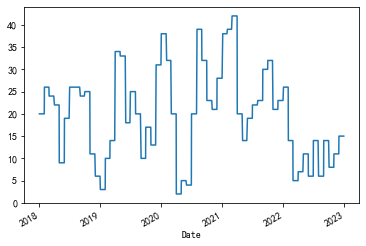

In [21]:
df_hold_weight.replace(0, np.nan).count(axis=1).plot()

In [25]:
df_hold_weight.sum(axis=1)

Date
2018-01-02    1.0
2018-01-03    1.0
2018-01-04    1.0
2018-01-05    1.0
2018-01-08    1.0
             ... 
2022-12-23    1.0
2022-12-27    1.0
2022-12-28    1.0
2022-12-29    1.0
2022-12-30    1.0
Length: 1259, dtype: float64

In [308]:
freq = 1
stock_return = df_price[f'return_{freq}d'].unstack()

n_group = 20

df_test = df_price['factor'].unstack()*df_hold_month
ic_values = df_test.rank(axis=1).corrwith(stock_return.rank(axis=1), axis=1).dropna()
print(ic_values.mean())
print(ic_values.mean()/ic_values.std())

long_returns = stock_return*df_hold_weight# (((np.sign(ic_values.mean())*df_test).rank(pct=True, axis=1)>=1-1/n_group).replace(False, np.nan)*stock_return).dropna(how='all')
long_returns = (long_returns[(long_returns.index>='2018-01-01')&(long_returns.index<='2023-01-01')].iloc[::,:].sum(axis=1)/freq+1)
annual_return = long_returns.cumprod().iloc[-1]**(252/len(long_returns))-1
print(annual_return)
print(annual_return/(long_returns.std()*np.sqrt(252)*np.sqrt(freq)))

bm_returns = ((0*df_test+1)*stock_return).dropna(how='all')
bm_returns = (bm_returns[(bm_returns.index>='2018-01-01')&(bm_returns.index<='2023-01-01')].iloc[::,:].mean(axis=1)/freq+1)
bm_return = bm_returns.cumprod().iloc[-1]**(252/len(bm_returns))-1

ex_return = annual_return-bm_return
ex_vol = (long_returns-bm_returns).std()*np.sqrt(252)*np.sqrt(freq)
ex_sharpei = ex_return/ex_vol
print(ex_return)
print(ex_sharpei)

# # 柱状图
# df_plot = pd.DataFrame(df_test.stack())
# df_plot['return'] = stock_return.stack()

# df_plot.loc[:, 'pct'] = df_plot[0].unstack().rank(axis=1, pct=True).stack()
# df_plot.loc[:, 'group'] = pd.qcut(df_plot['pct'], n_group, list(range(1,n_group+1)))
# (df_plot.groupby('group')['return'].mean()-df_plot['return'].mean()).plot.bar()
# plt.show()

-0.002147757009113038
-0.009505654796184902
0.47118961629056444
1.3063032610559977
0.28043041446024874
1.112818747232437


<AxesSubplot:xlabel='Date'>

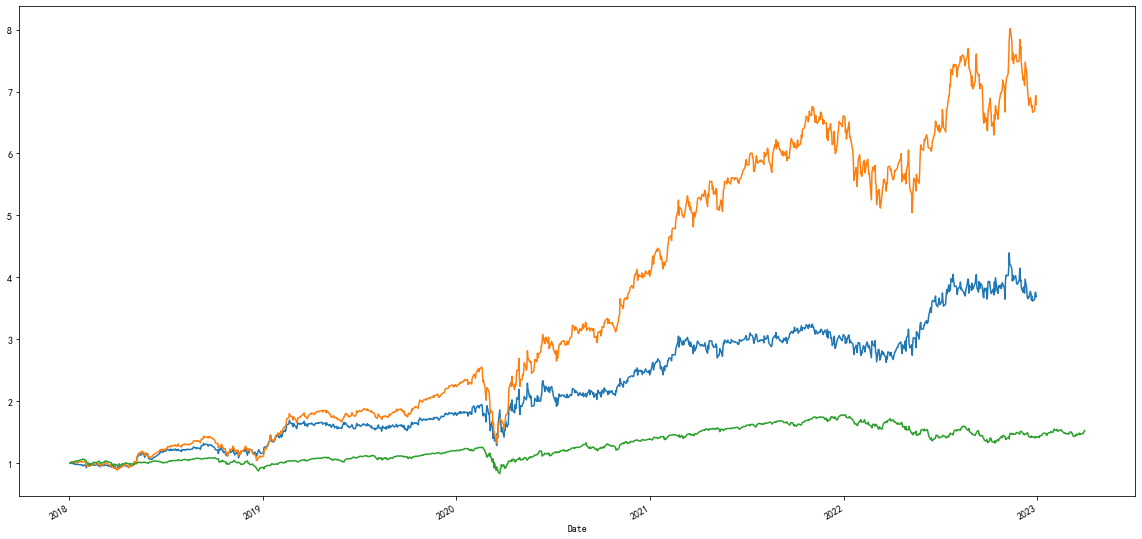

In [309]:
stg = (long_returns.cumprod())
stg = stg/stg.iloc[0]
bm = df_sp500['Adj Close'].loc['2018-01-01':]
bm = bm/bm.iloc[0]
(long_returns-bm.pct_change()).cumprod().loc['2018-01-01':].plot()
stg.loc['2018-01-01':].plot()
bm.loc['2018-01-01':].plot(figsize=(20,10))

                   0  Adj Close
Date                           
2018-12-31  0.110469  -0.070094
2019-12-31  1.016871   0.287148
2020-12-31  0.795828   0.152929
2021-12-31  0.579887   0.287931
2022-12-31  0.030779  -0.199531
2023-12-31       NaN   0.074571


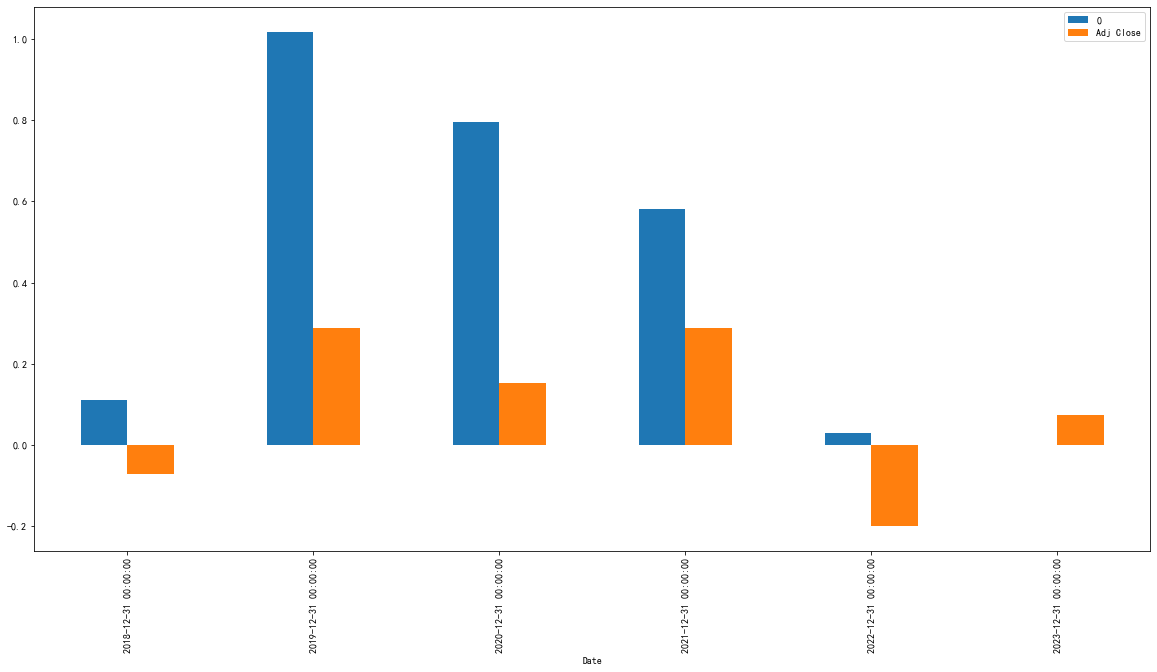

In [310]:
pd.concat([long_returns-1,bm.pct_change().fillna(0)], axis=1).resample('Y').apply(lambda x: (x+1).cumprod().iloc[-1]/((x+1).iloc[0])-1).plot.bar(figsize=(20,10))
print(pd.concat([long_returns-1,bm.pct_change().fillna(0)], axis=1).resample('Y').apply(lambda x: (x+1).cumprod().iloc[-1]/((x+1).iloc[0])-1))

<AxesSubplot:xlabel='Date'>

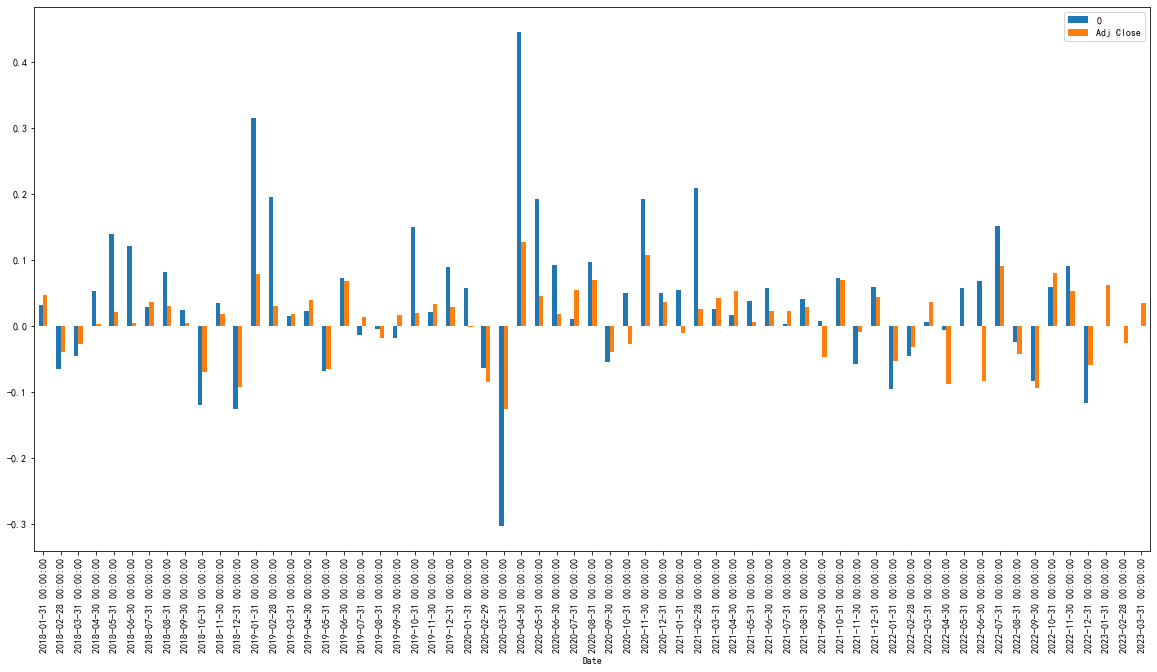

In [288]:
pd.concat([long_returns-1,bm.pct_change()], axis=1).resample('M').apply(lambda x: (x+1).cumprod().iloc[-1]-1).plot.bar(figsize=(20,10))